In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.stats import t
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

# Linear regression vs Gaussian regression

In this file we discuss the difference between a linear and a gaussian regression against a given non-linear dataset.

Before we compare the two regression methods, we prepare the data.

## Preparing the dataset.

A dataset is given so we only have to import the dataset with pandas. The x-values has to be reshapen because sklear want us to.

In [26]:
df = pd.read_excel("Data.xlsx")
x = df['x'].values.reshape(-1,1)
y = df['y'].values

In [27]:
x.shape # This is the shape we want.

(250, 1)

Now we have to split the data in a training set and a test set. We descided to make the last 20% of the data set the test set.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.99)

Now we let `sklear` create a linear regression of our training set.

In [29]:
model = linear_model.LinearRegression()
reg = model.fit(X_train, y_train)

Next we plot the data, as wel as the regression of the data.

[]

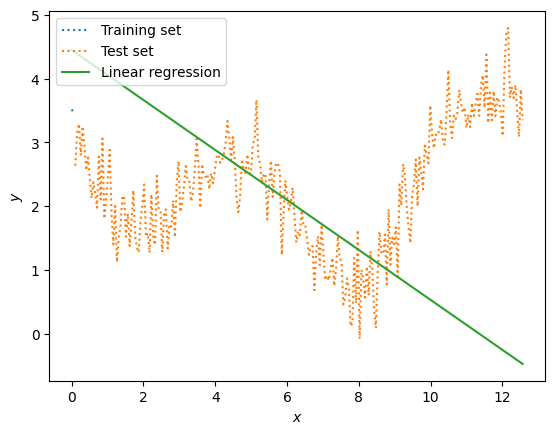

In [30]:
fig, ax = plt.subplots(1,1)
ax.plot(x[0:len(X_train)], y[0:len(X_train)], linestyle='dotted', label = "Training set")
ax.plot(x[len(X_train):], y[len(X_train):], linestyle="dotted", label="Test set")
ax.plot(x, reg.predict(x), label="Linear regression")

ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.legend(loc="upper left")
plt.plot()

## Gaussian Regression

To make a gaussian regression, the only thing we have to do is change te model. The same dataset as well as the same training and test set can be used. To make the model, the "radial bases function" (RBF) is used. This is a exponential fit. To use this fit we create the kernel, and then use the `GaussianProcessRegresor` function to create a model. Then we fit the model with the training data. Be warned, sometimes this fit can run longer (couple of seconds).

The `GaussianProcessRegressor` function has following arguments:
- `kernel`: the kernel that is being used (in our case the RBF function)
- `n_restart_optimizer`: number of times the optimezer restarts. This doens't have to be set, but sometimes the function creates a warning. So the argument can be tweaked.

Also we grab 2 attributes from the `fit`:

- `mean_prediction`: a list of mean values of the function
- `std_prediction`: prediction of the standard deviation of every mean value.

Basically the processor calculates a lot of gaussian curves for every entery.

In [31]:
kernel = 1.0 * RBF()
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer = 20)
gaussreg = gaussian_process.fit(X_train, y_train)
mean_prediction, std_prediction = gaussreg.predict(x, return_std=True)

Now that we have created a model, we can plot eveything. Also we do something special with this plot. Because the gaussian processor creates a lot of gaussian curves, we can have a 95% confidence interval, where 95% of our values will lay in between. To do this proparly, we have to use an inverse student t-distirbution calculation to get the confidance level. This should be around 1.96.

In [32]:
t_crit = t.ppf(1-0.05/2, 250-1)
t_crit

1.9695368676395824

We can see that our t-value is around 1.96 (which it should be). The 95% condfidence interval is defined as follows:

$$ \mu\ -\ t\ \sigma\ \leq\ \mu\ \leq\ \mu\ +\ t\ \sigma$$

With `matplotlib` we can fill a plot inbetween 2 values. This is a nice way to display the interval.

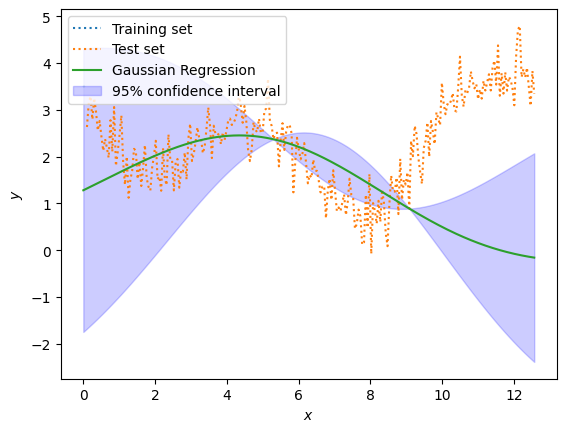

In [33]:
fig2, ax2 = plt.subplots(1,1)

ax2.plot(x[0:len(X_train)], y[0:len(X_train)], linestyle='dotted', label = "Training set")
ax2.plot(x[len(X_train):], y[len(X_train):], linestyle="dotted", label="Test set")

ax2.plot(x, mean_prediction, label="Gaussian Regression")
ax2.fill_between(
    x.ravel(),
    mean_prediction - t_crit * std_prediction,
    mean_prediction + t_crit * std_prediction,
    alpha = 0.2, # transparancy of filler
    color="blue",
    label=r"95% confidence interval",
)

ax2.set_xlabel("$x$")
ax2.set_ylabel("$y$")
ax2.legend(loc="upper left")

plt.show()


## Adding noise

We notice, that the regression show a lot of noise. This noise can be minimized when defining noise into the kernel. This can be done with `Whitekernel`. The process is the same as before but we add noise to the kernel.

In [34]:
kernel = 1.0 * RBF() + WhiteKernel()
model = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20)
gaussreg = model.fit(X_train, y_train)
mean_prediction, std_prediction = gaussreg.predict(x, return_std=True)

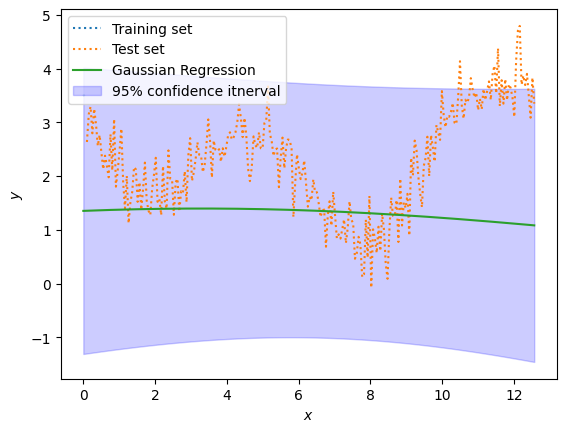

In [35]:
fig3, ax3 = plt.subplots(1,1)

ax3.plot(x[0:len(X_train)], y[0:len(X_train)], linestyle='dotted', label = "Training set")
ax3.plot(x[len(X_train):], y[len(X_train):], linestyle="dotted", label="Test set")

ax3.plot(x, mean_prediction, label="Gaussian Regression")
ax3.fill_between(
    x.ravel(),
    mean_prediction - t_crit * std_prediction,
    mean_prediction + t_crit * std_prediction,
    alpha = 0.2, # transparancy of filler
    color="blue",
    label=r"95% confidence itnerval",
)

ax3.set_xlabel("$x$")
ax3.set_ylabel("$y$")
ax3.legend(loc="upper left")

plt.show()

Now we see that the noise is eliminated in the regression.

## Linear vs Gaussian

To visualize the differences between the linear and gaussian regression methods, it is best to plot them together against the dataset.

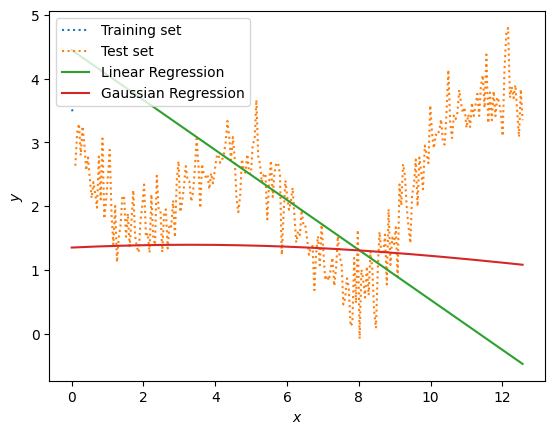

In [36]:
fig3, ax3 = plt.subplots(1,1)

ax3.plot(x[0:len(X_train)], y[0:len(X_train)], linestyle='dotted', label = "Training set")
ax3.plot(x[len(X_train):], y[len(X_train):], linestyle="dotted", label="Test set")
ax3.plot(x, reg.predict(x), label="Linear Regression")
ax3.plot(x, mean_prediction, label="Gaussian Regression")

ax3.set_xlabel("$x$")
ax3.set_ylabel("$y$")
ax3.legend(loc="upper left")

plt.show()

## Conclusion

The basics of both linear and gaussian regression are fairly simple to do with `sklearn`. Which regression to use depends on the situation. In this example, the data set is non-linear, which means that linear regression cannot be used in this example. The plots also show a case of underfitting when using linear regression. Gaussian regression on the other hand doens´t show a clear sign of under- or overfitting. Therefor, the regression is useable for this dataset, and this range. To optimize the regression, you can use a big dataset (if possible) or have a longer dataset. Also other kernels can be tested, such as `ExpSineSquare`.